# Regressão Logística
***

## Importando bibliotecas

In [2]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/cynthiamaia/MonitoriaEmbraer/main/Datasets/Iris.csv')

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [4]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Separando o conjunto de dados**

In [5]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Treinamento do modelo 

In [6]:
model = LogisticRegression()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Região de decisão

In [7]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

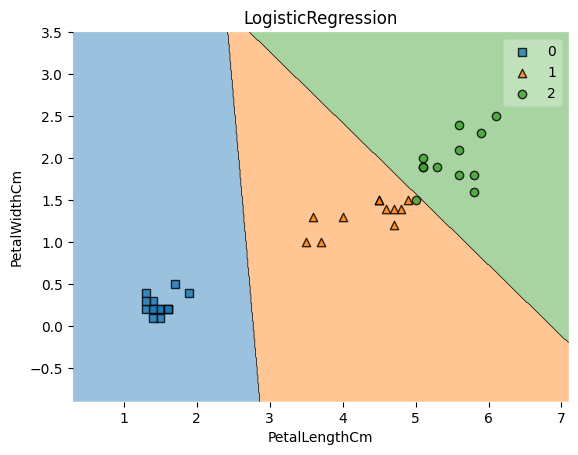

In [8]:
show_decision_region(X_test, y_test, model)

## E se ajustarmos os parâmetros

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ... referenciando o modelo
model = LogisticRegression()

#penalty - depende do algoritmo usado para otimização (solver) padrão: ‘lbfgs’ - [‘l2’, None]
# 'none': nenhuma penalidade é adicionada;
# 'l2': adiciona um termo de penalidade L2 e é a escolha padrão;

parameters = {'penalty': ['L2', 'none']}

parameters = {'penalty': ['l2', None]}

grid = GridSearchCV(estimator=model,             
                    param_grid=parameters,     
                    scoring='f1_macro',          
                    cv=5)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhor parâmetro:", grid.best_params_)        
print(classification_report(y_test, y_pred))

Melhor parâmetro: {'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

